<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


In [23]:
df

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1
5,14,9.96,Grupo_1
6,6,7.24,Grupo_1
7,4,4.26,Grupo_1
8,12,10.84,Grupo_1
9,7,4.82,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

### 1. Gráfico de puntos todos los grupos

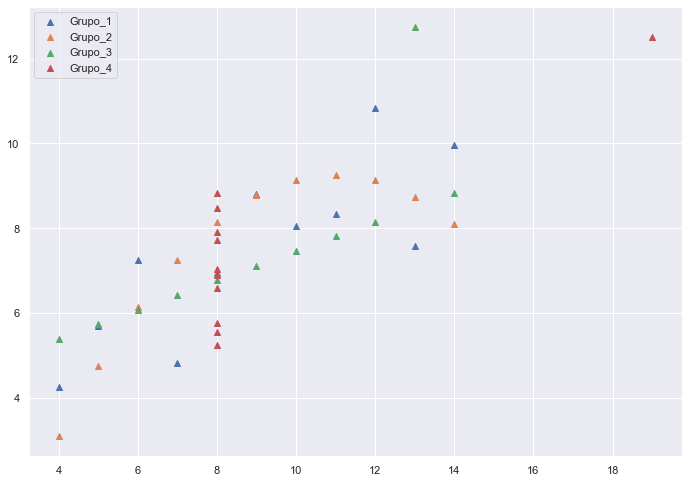

In [14]:
fig, ax = plt.subplots()
for color in df["grupo"].unique():
    x=df.loc[df["grupo"]==color]["x"] ## extrae el data frame con ese label y luego la columna deseada
    y=df.loc[df["grupo"]==color]["y"]
    ax.scatter(x, y, label=color,marker='^')

ax.legend()
ax.grid(True)

plt.show()

Podemos notar que los grupos 1,2 y 3 tienen un comportamiento parecido dentro de una banda, sin embargo el grupo 4 difiere verticalmente

Realizaré por grupos las preguntas de la 2 a la 5 para que el codigo no quede execesivamente largo

### Grupo 1

2. Resumen estadístico:

In [17]:
df.loc[df["grupo"]=="Grupo_1"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


3. Gráfica del ajuste lineal

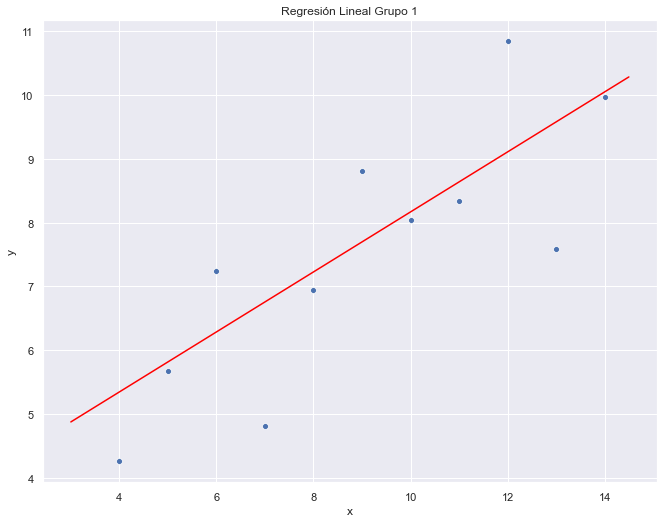

In [259]:
from sklearn.model_selection import train_test_split

# import some data to play with
data= df.loc[df["grupo"]=="Grupo_1"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
# graficos con seaborn
        
beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(3,15,0.5)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})
  
df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regresión Lineal Grupo 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Este grupo tiene un comportamiento en general lineal

4. Resume métricas estadisticas regresión lineal: 

In [280]:


import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     9.834
Date:                Thu, 05 Nov 2020   Prob (F-statistic):             0.0202
Time:                        14:14:01   Log-Likelihood:                -12.443
No. Observations:                   8   AIC:                             28.89
Df Residuals:                       6   BIC:                             29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4668      1.357      2.555      0.0

C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Presenta un $R^2$ cercano a 1 más que a cero por lo que el ajuste es aceptable

5. Estrategias para mejorar el modelo

In [6]:
data= df.loc[df["grupo"]=="Grupo_1"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]

In [5]:
data= df.loc[df["grupo"]=="Grupo_1"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



NameError: name 'train_test_split' is not defined

In [286]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf2 =clf.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7166807430028777

In [7]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf2 =clf.fit(X, y)

y_pred = clf2.predict(X)
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.6662759394501669

Osea el lasso mejora el modelo al tener mejor $R^2$

### Grupo 2

2. Resumen estadístico:

In [208]:
df.loc[df["grupo"]=="Grupo_2"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


3. Gráfica del ajuste lineal

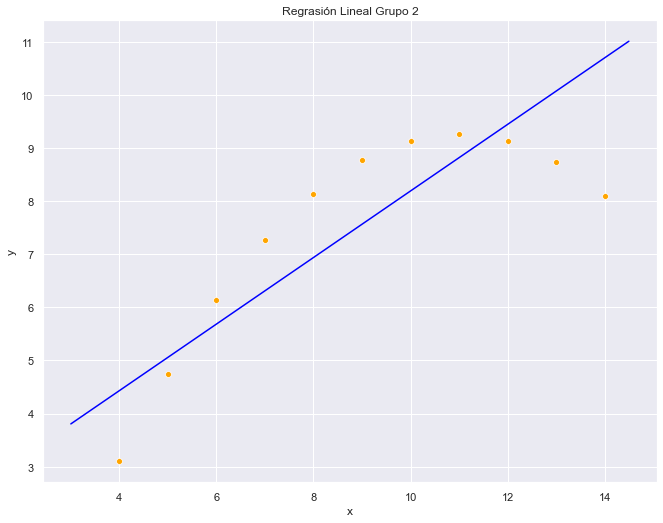

recta: y= 1.9240384615384638 +x* 0.6267307692307691


In [261]:


# import some data to play with
data= df.loc[df["grupo"]=="Grupo_2"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
# graficos con seaborn
        
beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(3,15,0.5)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})
  
df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="orange")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="blue")

plt.title('Regrasión Lineal Grupo 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("recta: y=",beta_0,"+x*",beta_1[0])

Los datos no son lineales sin embargo la recta no parece estar tan alejada

4. Resume métricas estadisticas regresión lineal: 

In [262]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     26.13
Date:                Thu, 05 Nov 2020   Prob (F-statistic):            0.00220
Time:                        13:43:09   Log-Likelihood:                -10.838
No. Observations:                   8   AIC:                             25.68
Df Residuals:                       6   BIC:                             25.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9240      1.110      1.733      0.1

C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Presenta un buen $R^2$ dado que los datos son cercanos a la recta sin embargo el comportamiento no es tan lineal

5. Estrategias para mejorar el modelo

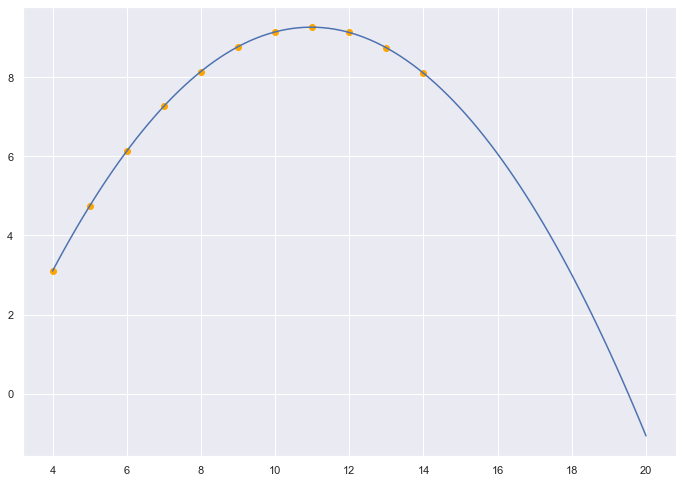

In [265]:
import numpy
import matplotlib.pyplot as plt
data= df.loc[df["grupo"]=="Grupo_2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = list(data.x) # we only take the first two features.
y = list(data.y)
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

myline = numpy.linspace(4, 20, 100)

plt.scatter(X, y,color="orange")
plt.plot(myline, mymodel(myline))
plt.show()

In [246]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(X)))

0.999999457857722


Un parabola describe casi perfecto los datos

### Grupo 3

2. Resumen estadístico:

In [211]:
df.loc[df["grupo"]=="Grupo_3"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


3. Gráfica del ajuste lineal

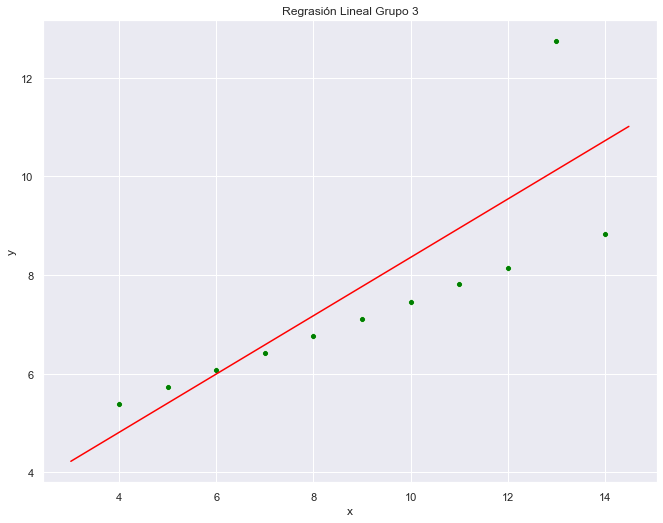

In [270]:


# import some data to play with
data= df.loc[df["grupo"]=="Grupo_3"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
# graficos con seaborn
        
beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(3,15,0.5)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})
  
df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="green")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regrasión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Se ajuste bastante bien excepto por uno

4. Resume métricas estadisticas regresión lineal: 

In [271]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     14.71
Date:                Thu, 05 Nov 2020   Prob (F-statistic):            0.00860
Time:                        13:45:42   Log-Likelihood:                -12.655
No. Observations:                   8   AIC:                             29.31
Df Residuals:                       6   BIC:                             29.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4553      1.393      1.762      0.1

C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Presenta un buen $R^2$

5. Estrategias para mejorar el modelo

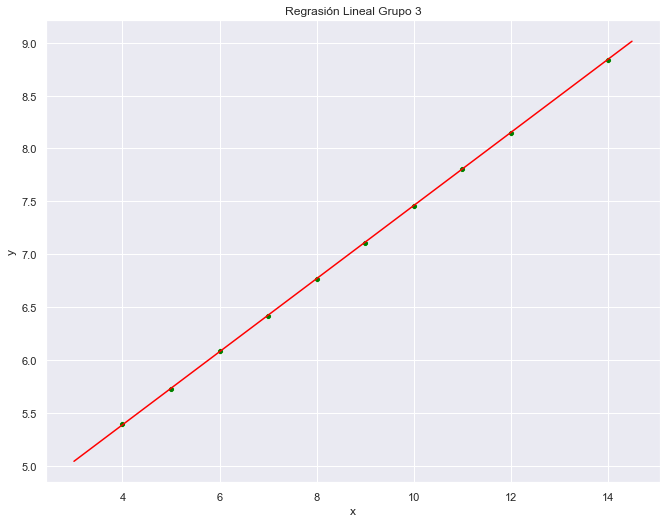

In [272]:
from sklearn.model_selection import train_test_split

# import some data to play with
data= df.loc[df["grupo"]=="Grupo_3"]
mask=data["y"]<12 ##elimina outlaier
data= data[mask]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
# graficos con seaborn
        
beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(3,15,0.5)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})
  
df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="green")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regrasión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

eliminando el outlier funciona perfecto

### Grupo 4

2. Resumen estadístico:

In [210]:
df.loc[df["grupo"]=="Grupo_4"].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


3. Gráfica del ajuste lineal

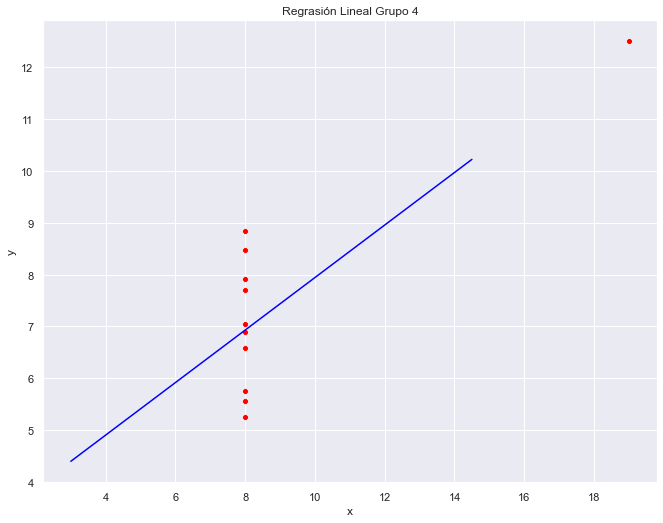

In [273]:
from sklearn.model_selection import train_test_split

# import some data to play with
data= df.loc[df["grupo"]=="Grupo_4"]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train) 
# graficos con seaborn
        
beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(3,15,0.5)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})
  
df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="red")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="blue")

plt.title('Regrasión Lineal Grupo 4')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

El comportamiento no es lineal pues para un mismo dato x tenemos diferentes valores para y

4. Resumen métricas estadisticas regresión lineal: 

In [275]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     10.47
Date:                Thu, 05 Nov 2020   Prob (F-statistic):             0.0231
Time:                        13:46:18   Log-Likelihood:                -12.016
No. Observations:                   7   AIC:                             28.03
Df Residuals:                       5   BIC:                             27.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8820      1.614      1.785      0.1

C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Presenta un buen $R^2$ al estar cerca sin embargo baja curtosis positiva ya que los datos estan muy concentrados

5. Estrategias para mejorar el modelo

no hay forma de arreglarlo ya que el problema está degenerado al presentar varias observaciones para un x